# 数据预处理（归一+可视化）

In [1]:
import pandas as pd
data=pd.read_excel('中心城市客运量 广州.xlsx',engine='openpyxl',header=0)
print(data.shape)
data.head()

(48, 3)


,时间,中心城市客运量:广州:累计值:月,中心城市客运量:广州:当期值:月
0,2022-12-31,374417,18319
1,2022-11-30,356098,13942
2,2022-10-31,342156,31599
3,2022-09-30,310557,35338
4,2022-08-31,275219,38040


In [2]:
data.drop("中心城市客运量:广州:当期值:月", axis=1, inplace=True)

In [3]:
# 将时间列转换为日期时间类型并按时间升序排列
data['时间'] = pd.to_datetime(data['时间'])
data = data.sort_values(by='时间')

In [4]:
# 重置索引并添加新的序号列
data = data.reset_index(drop=True)

In [5]:
data.head()

,时间,中心城市客运量:广州:累计值:月
0,2019-01-31,51280
1,2019-02-28,89736
2,2019-03-31,143972
3,2019-04-30,195113
4,2019-05-31,248139


In [6]:
data.columns

Index(['时间', '中心城市客运量:广州:累计值:月'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   时间                48 non-null     datetime64[ns]
 1   中心城市客运量:广州:累计值:月  48 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 900.0 bytes


In [8]:
import matplotlib.pyplot as plt

C:\Users\86158\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


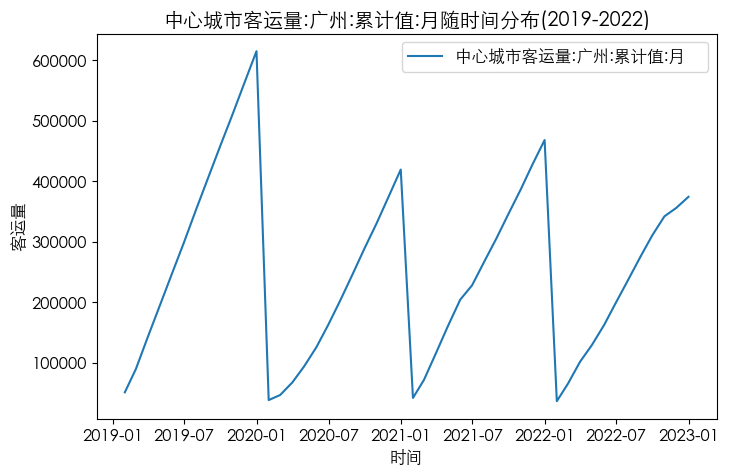

In [9]:
# 绘制折线图
plt.rc('font', family='STXihei', size=12)
plt.figure(figsize=(8, 5))
plt.plot(data['时间'], data['中心城市客运量:广州:累计值:月'], label='中心城市客运量:广州:累计值:月	')
plt.xlabel('时间')
plt.ylabel('客运量')
plt.title('中心城市客运量:广州:累计值:月随时间分布(2019-2022)')
plt.legend()
plt.grid(False)
plt.show()

In [10]:
df = pd.DataFrame(data)
df

,时间,中心城市客运量:广州:累计值:月
0,2019-01-31,51280
1,2019-02-28,89736
2,2019-03-31,143972
3,2019-04-30,195113
4,2019-05-31,248139
5,2019-06-30,299032
6,2019-07-31,353734
7,2019-08-31,406996
8,2019-09-30,458398
9,2019-10-31,510292


# arima模型建立

In [11]:
from __future__ import print_function
import numpy as np
from scipy import  stats
import statsmodels.api as sm
import time
from datetime import datetime
from statsmodels.graphics.api import qqplot

<Axes: >

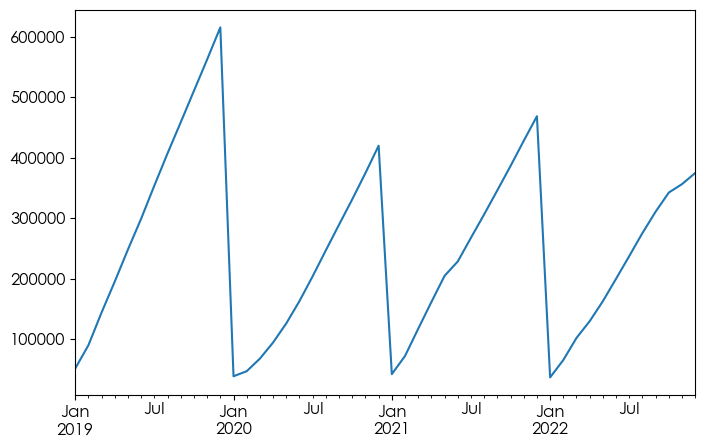

In [12]:
dta=pd.Series(df['中心城市客运量:广州:累计值:月'])
# 创建与数据长度相匹配的日期范围
date_range = pd.date_range(start='2019-01-31', periods=len(dta), freq='M')
# 将日期范围设置为索引
dta.index = date_range
dta.plot(figsize=(8,5))

# 拆分d

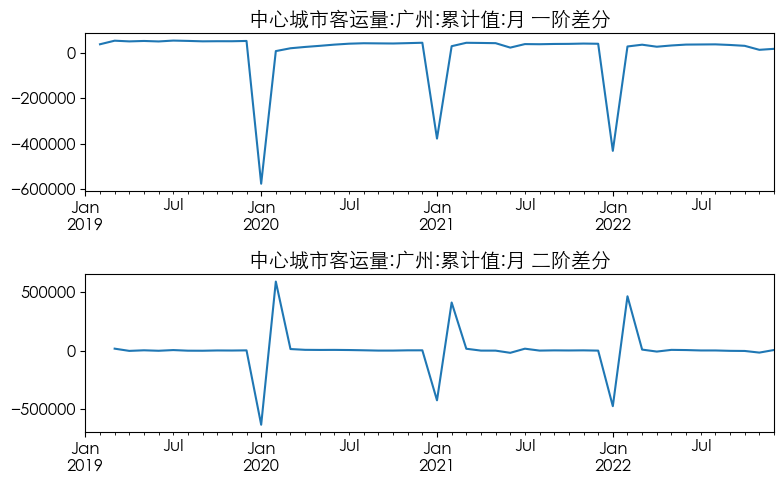

In [13]:
# 一阶差分（拆分d）
diff1 = dta.diff(1)

# 二阶差分
diff2 = diff1.diff(1)

# 创建图形
fig, ax = plt.subplots(2, 1, figsize=(8, 5))

# 绘制一阶差分数据图
diff1.plot(ax=ax[0])
ax[0].set_title('中心城市客运量:广州:累计值:月 一阶差分')

# 绘制二阶差分数据图
diff2.plot(ax=ax[1])
ax[1].set_title('中心城市客运量:广州:累计值:月 二阶差分')

# 设置图形标题和标签
plt.tight_layout()
plt.show()

# 一阶和二阶拆分区别不大，一阶已经得到一个基本平稳的时间序列，故使用一阶拆分

<Axes: title={'center': '中心城市客运量:广州:累计值:月 一阶差分时间序列'}>

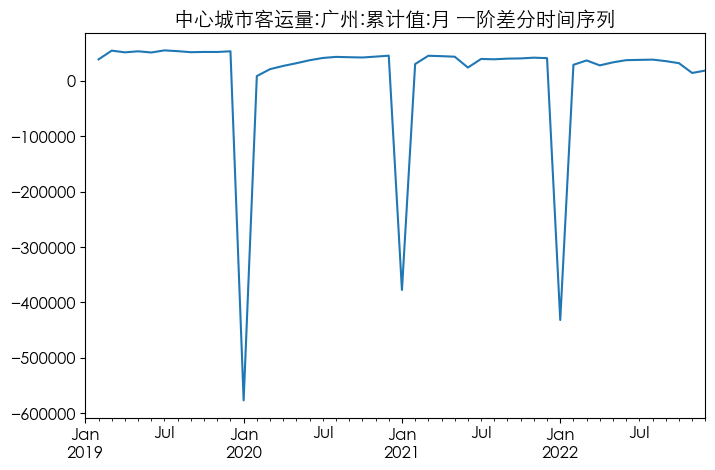

In [14]:
#一阶差分,得到一个基本平稳的时间序列
fig = plt.figure(figsize=(8,5))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
# 添加标题
ax1.set_title('中心城市客运量:广州:累计值:月 一阶差分时间序列')
diff1.plot(ax=ax1)

# 在ARIMA模型中选择合适的p,d,q

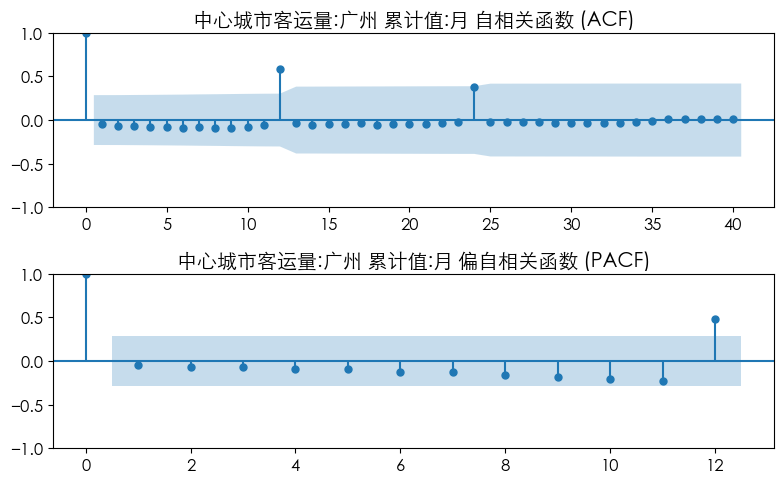

In [15]:
diff1= dta.diff(1) # 使用一阶差分的时间序列
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(diff1.dropna(), lags=40, ax=ax1)  # 使用 dropna() 移除由于差分产生的 NaN 值
ax1.set_title('中心城市客运量:广州 累计值:月 自相关函数 (ACF)')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(diff1.dropna(), lags=12, ax=ax2)  # 使用 dropna() 移除由于差分产生的 NaN 值
ax2.set_title('中心城市客运量:广州 累计值:月 偏自相关函数 (PACF)')
plt.tight_layout()  # 调整子图间距

# 经过检验，选择自回归阶数p为8，差分阶数d为1，移动平均阶数q为8

In [60]:
# 拟合 ARMA(8,1,8) 模型
arma_mod10 = sm.tsa.ARIMA(dta, order=(8, 1, 8)).fit()
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

# 拟合 ARMA(1,0,0) 模型
arma_mod01 = sm.tsa.ARIMA(dta, order=(1, 0, 0)).fit()
print(arma_mod01.aic, arma_mod01.bic, arma_mod01.hqic)

# 拟合 ARMA(2,1,2) 模型
arma_mod20 = sm.tsa.ARIMA(dta, order=(2, 1, 2)).fit()
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

# 拟合 ARMA(0,1,0) 模型
arma_mod010 = sm.tsa.ARIMA(dta, order=(0, 1, 0)).fit()
print(arma_mod010.aic, arma_mod010.bic, arma_mod010.hqic)

C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1249.6651185161425 1281.1176277452134 1261.5009090289673
1260.2079435639448 1265.8215465966684 1262.3293323497396
1238.1916787995103 1247.4424168080607 1241.6727936562236
1238.5025115220471 1240.3526591237571 1239.1987344933898


# 选择ARIMA(8,1,8)模型

ARIMA（8，1，8）得到的预测结果与实际最符合

# 检验残差序列

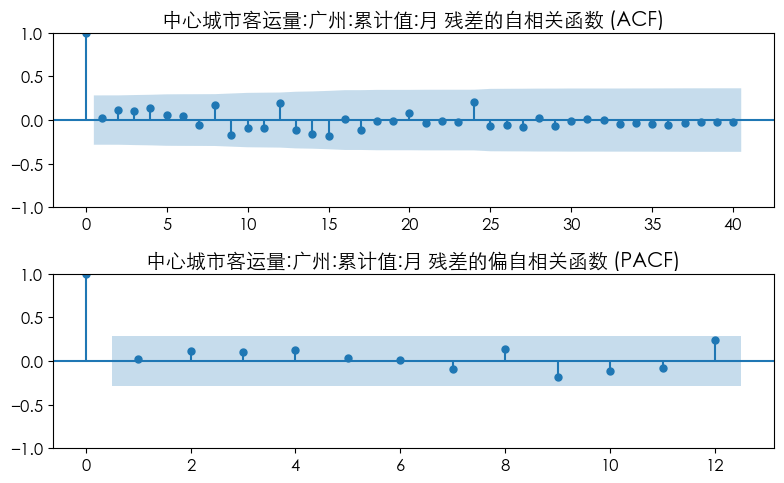

In [61]:
# 查模型的残差是否表现为白噪声
resid = arma_mod10.resid
# 绘制图形
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)  # 绘制自相关图
ax1.set_title('中心城市客运量:广州:累计值:月 残差的自相关函数 (ACF)')

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(resid, lags=12, ax=ax2)  # 绘制偏自相关图
ax2.set_title('中心城市客运量:广州:累计值:月 残差的偏自相关函数 (PACF)')

plt.tight_layout()  # 调整子图间距
plt.show()

In [62]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))

1.9229232999469514


结果为1.546630547060376，所以残差序列不存在自相关性。

# 观察是否呈正态分布

NormaltestResult(statistic=20.559615332418293, pvalue=3.431912887114168e-05)


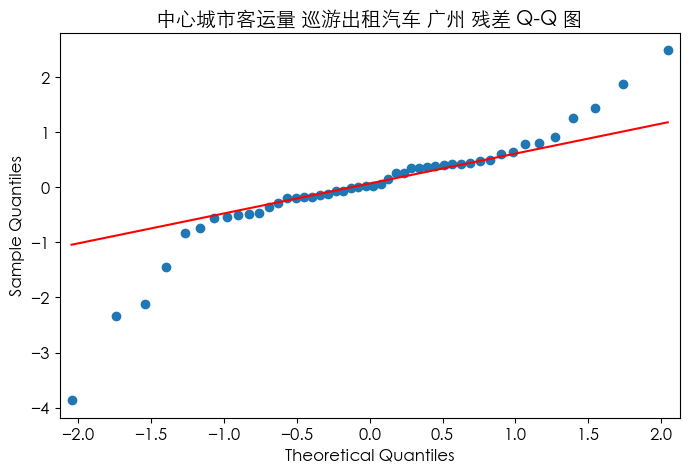

In [63]:
print(stats.normaltest(resid))
# 检测残差的正态性
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
ax.set_title('中心城市客运量 巡游出租汽车 广州 残差 Q-Q 图')
plt.show()

结果表明基本符合正态分布

# 残差序列Ljung-Box检验，也叫Q检验预测

In [64]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,17), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))


            AC          Q  Prob(>Q)
lag                                
1.0   0.021892   0.024472  0.875689
2.0   0.116769   0.735867  0.692163
3.0   0.106463   1.340368  0.719570
4.0   0.136804   2.361211  0.669648
5.0   0.057057   2.542915  0.770019
6.0   0.047119   2.669782  0.849003
7.0  -0.051663   2.826020  0.900617
8.0   0.167404   4.507459  0.808686
9.0  -0.166389   6.211169  0.718612
10.0 -0.088121   6.701604  0.753283
11.0 -0.087044   7.193060  0.783241
12.0  0.190467   9.611561  0.649996
13.0 -0.118611  10.576262  0.646268
14.0 -0.162034  12.429559  0.571848
15.0 -0.185363  14.928428  0.456585
16.0  0.016806  14.949611  0.528332


prob值并不都大于0.05，所以残差序列存在自相关性，不是白噪声序列-可考虑sarima

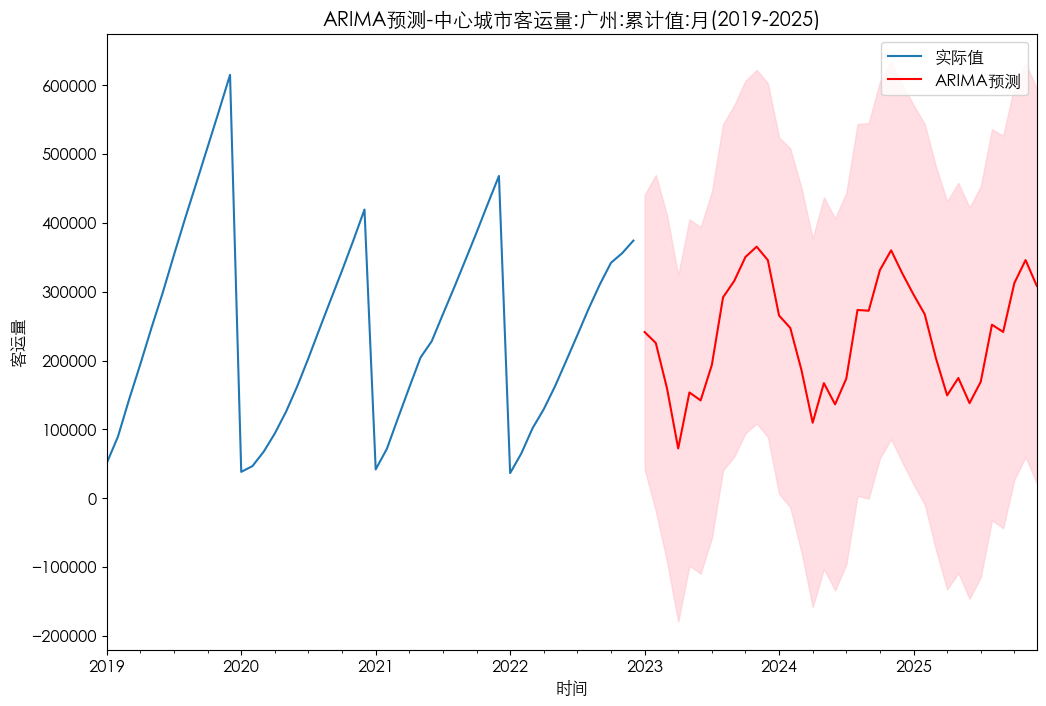

In [66]:
# 获取预测结果
forecast = arma_mod10.get_forecast(steps=36)  # 预测未来 36 个时间步长，即到2025年底

# 绘制实际数据和预测数据
fig, ax = plt.subplots(figsize=(12, 8))
dta.plot(ax=ax, label='实际值')  # 绘制全部实际数据

# 绘制预测数据
forecast.predicted_mean.plot(ax=ax, label='ARIMA预测', color='red')

# 绘制置信区间
ci = forecast.conf_int()
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.5)

# 设置图形标题和标签
plt.xlabel('时间')
plt.ylabel('客运量')
plt.title('ARIMA预测-中心城市客运量:广州:累计值:月(2019-2025)')
plt.legend()
plt.show()

